Setup (Imports & Paths)

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = r"C:\Users\tarun\OneDrive\Desktop\Solar-Panel-Detection\data"

IMAGE_DIRS = {
    "hd": os.path.join(BASE_DIR, "images", "hd"),
    "native": os.path.join(BASE_DIR, "images", "native")
}
LABEL_DIRS = {
    "hd": os.path.join(BASE_DIR, "labels", "hd"),
    "native": os.path.join(BASE_DIR, "labels", "native")
}

RESULTS_DIR = os.path.join(BASE_DIR, "results")
SAMPLE_IMAGES_DIR = os.path.join(RESULTS_DIR, "sample_images")
os.makedirs(RESULTS_DIR, exist_ok=True)
os.makedirs(SAMPLE_IMAGES_DIR, exist_ok=True)

IMAGE_SIZES = {"hd": (832, 832), "native": (416, 416)}
REAL_WORLD_SCALE = {"hd": (15.5 / 832), "native": (31 / 416)}

print("Setup complete. Paths initialized.")

Setup complete. Paths initialized.


Load labels

In [ ]:
def load_labels(label_path):
    if not os.path.exists(label_path):
        return []
    
    with open(label_path, "r") as f:
        lines = f.readlines()
    
    boxes = []
    for line in lines:
        values = list(map(float, line.strip().split()))
        if len(values) == 5:  # YOLO format: class_id, x_center, y_center, width, height
            boxes.append(values)
    
    return boxes

print("Label loading function ready.")


Label loading function ready.


Counting Solar Panel Instances

In [ ]:
def count_solar_panel_instances(image_type="hd"):
    label_dir = LABEL_DIRS[image_type]
    total_instances = 0
    label_counts = []
    
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        bboxes = load_labels(label_path)
        total_instances += len(bboxes)
        label_counts.append(len(bboxes))
    
    unique, counts = np.unique(label_counts, return_counts=True) 
    label_distribution = dict(zip(unique, counts))
    
    print(f"Total solar panel instances in {image_type}: {total_instances}")
    print(f"Label distribution in {image_type}: {label_distribution}")

count_solar_panel_instances("hd")
count_solar_panel_instances("native")

Total solar panel instances in hd: 29880
Label distribution in hd: {1: 82, 2: 170, 3: 202, 4: 229, 5: 219, 6: 202, 7: 171, 8: 164, 9: 175, 10: 132, 11: 97, 12: 77, 13: 73, 14: 53, 15: 42, 16: 37, 17: 32, 18: 30, 19: 29, 20: 13, 21: 6, 22: 4, 23: 4, 24: 4, 25: 1, 26: 7, 27: 4, 28: 4, 29: 21, 30: 9, 31: 7, 32: 6, 33: 8, 34: 20, 35: 10, 36: 14, 37: 15, 38: 19, 39: 12, 40: 10, 41: 8, 42: 9, 43: 9, 44: 5, 45: 4, 46: 7, 47: 7, 48: 3, 49: 7, 50: 13, 51: 3, 52: 12, 53: 2, 54: 4, 56: 3, 57: 3, 58: 1, 59: 1, 60: 2, 61: 3, 62: 2, 63: 2, 64: 1, 65: 5, 66: 1, 67: 3, 68: 1, 69: 1, 70: 4, 71: 2, 72: 1, 74: 1, 75: 2, 76: 1, 77: 2, 78: 1, 79: 2}
Total solar panel instances in native: 29625
Label distribution in native: {1: 81, 2: 167, 3: 221, 4: 218, 5: 217, 6: 189, 7: 170, 8: 184, 9: 169, 10: 121, 11: 97, 12: 84, 13: 69, 14: 49, 15: 46, 16: 41, 17: 36, 18: 25, 19: 29, 20: 14, 21: 4, 22: 1, 23: 4, 24: 2, 25: 4, 26: 3, 27: 5, 28: 5, 29: 15, 30: 20, 31: 8, 32: 7, 33: 13, 34: 19, 35: 10, 36: 6, 37: 17, 38

Some of the images had extremely large box plots due to the images being zoomed in a lot, hence disrupting the values of central tendency like mean. Hence, I have trimmed a small portion of the dataset which depicted the outliers. The standard deviation, however didn't change much since it doesn't get affected much by outliers. The statistics before and after removal of outliers has been computed below.

Computing Area Statistics

Areas of solar panels in hd images(converted to real world scale):
[0.7829893213757396, 0.42481335521449703, 0.6719270062869824, 0.19956509742511097, 0.34984629252958577, 0.5192163230399409, 1.0301029724482251, 0.20754770132211542, 0.15166947404308434, 1.724242441752959, 0.5497584596893491, 0.849626710428994, 0.7822951819064352, 0.27973820612980765, 0.7829893213757396, 0.42481335521449703, 0.6719270062869824, 0.19956509742511097, 0.34984629252958577, 0.5192163230399409, 1.0301029724482251, 0.20754770132211542, 0.15166947404308434, 1.724242441752959, 0.5497584596893491, 0.849626710428994, 0.7822951819064352, 0.38802396334134615, 0.27973820612980765, 0.7829893213757396, 0.42481335521449703, 0.6719270062869824, 0.19956509742511097, 0.34984629252958577, 0.5192163230399409, 1.0301029724482251, 0.20754770132211542, 0.15166947404308434, 1.724242441752959, 0.5497584596893491, 0.849626710428994, 0.5539232965051775, 0.7822951819064352, 0.8506679196329512, 1.8047626201923077, 0.9891487437592456, 

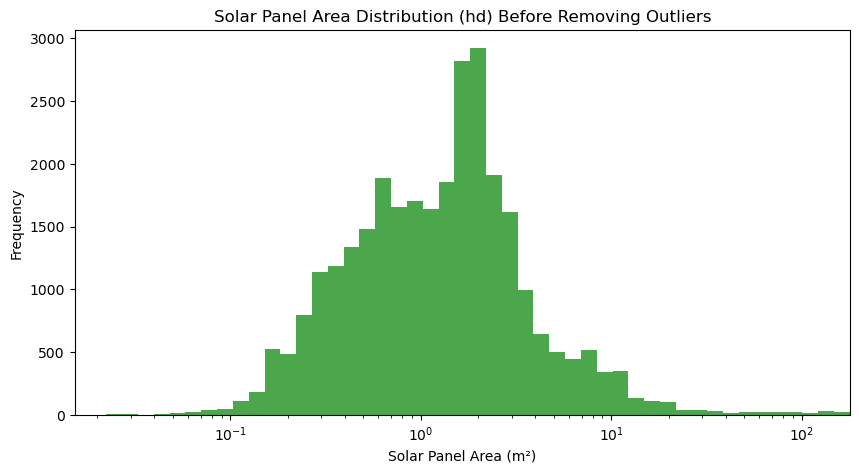

IQR Values: Q1=0.582036, Q3=2.308014, IQR=1.725978
Outlier Thresholds: Lower=-2.006931, Upper=4.896980
Areas of solar panels in hd images(converted to real world scale):
[0.78298932 0.42481336 0.67192701 ... 0.53934637 3.6421498  2.95599293]
Mean area in hd: 1.389688 meters²
Standard deviation of area in hd: 1.033847 meters²
Max panel area: 4.89 m²
99th percentile: 4.49 m²
95th percentile: 3.41 m²
5th percentile: 0.22 m²


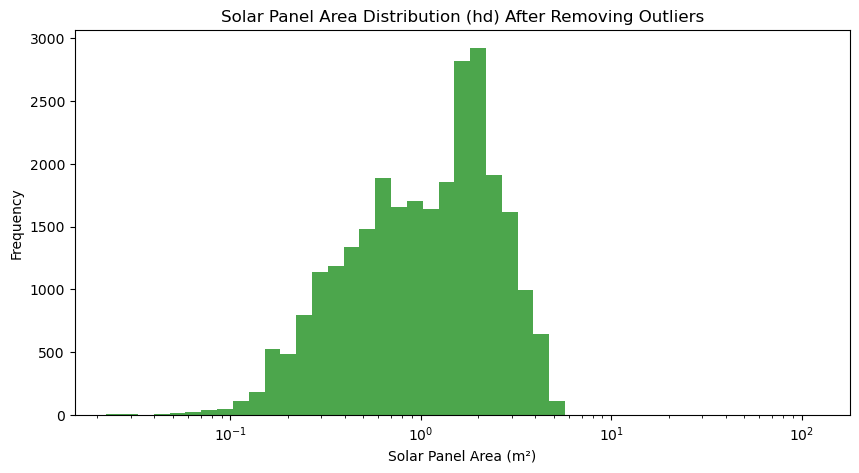

Areas of solar panels in native images(converted to real world scale):
[3.0653198964497044, 1.5992973372781063, 2.6877080251479297, 0.7996486686390532, 1.399385170118343, 0.2832089034763314, 3.4651442307692304, 1.1550480769230769, 3.0653198964497044, 1.5992973372781063, 2.6877080251479297, 0.7996486686390532, 1.399385170118343, 1.9824623243343193, 3.8982872596153846, 0.7940955528846154, 0.6108427329881657, 6.996925850591716, 2.1990338387573964, 3.4651442307692304, 1.1550480769230769, 3.0653198964497044, 1.5992973372781063, 2.6877080251479297, 0.7996486686390532, 1.399385170118343, 1.9824623243343193, 3.8982872596153846, 0.7940955528846154, 0.6108427329881657, 6.996925850591716, 2.1990338387573964, 3.4651442307692304, 1.999121671597633, 3.1930415588017755, 3.4207193047337285, 7.33011279585799, 3.887181028106509, 1.1550480769230769, 0.7330112795857988, 1.399385170118343, 1.9824623243343193, 3.8982872596153846, 0.7940955528846154, 0.6108427329881657, 6.996925850591716, 2.1990338387573964,

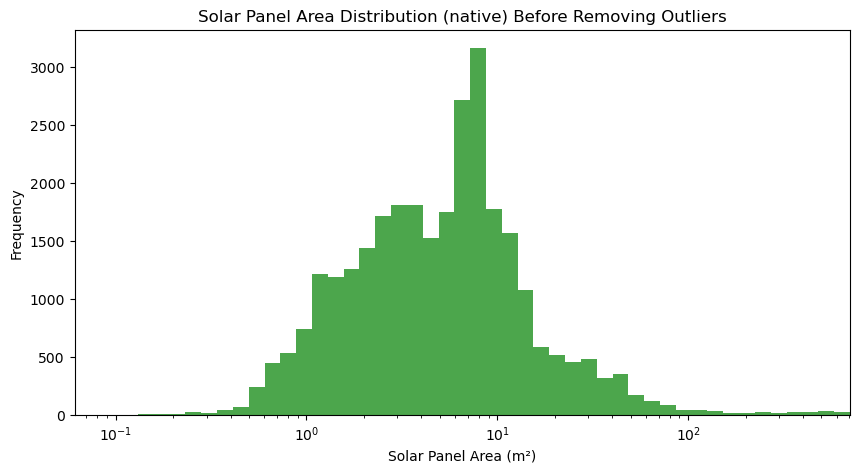

IQR Values: Q1=2.321202, Q3=9.240385, IQR=6.919182
Outlier Thresholds: Lower=-8.057571, Upper=19.619158
Areas of solar panels in native images(converted to real world scale):
[3.0653199  1.59929734 2.68770803 ... 7.96872111 5.39762851 2.17682138]
Mean area in native: 5.575353 meters²
Standard deviation of area in native: 4.149412 meters²
Max panel area: 19.59 m²
99th percentile: 18.13 m²
95th percentile: 13.68 m²
5th percentile: 0.86 m²


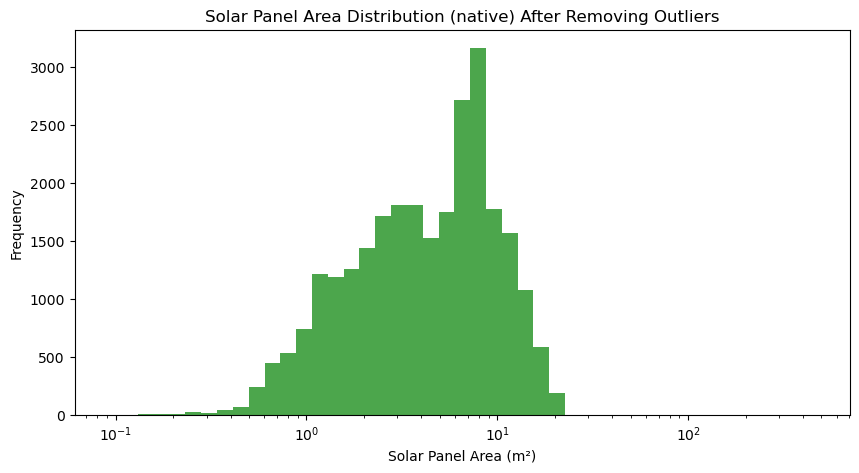

In [ ]:
def compute_area_statistics(image_type="hd"):
    label_dir = LABEL_DIRS[image_type]
    panel_areas = []
    
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        bboxes = load_labels(label_path)
        for _, _, _, width, height in bboxes:
            img_w, img_h = IMAGE_SIZES[image_type]
            scale = REAL_WORLD_SCALE[image_type]
            real_width = width * img_w * scale
            real_height = height * img_h * scale
            area = real_width * real_height
            panel_areas.append(area)
    
    if not panel_areas:
        print(f"No panel areas found in {image_type}")
        return
    
    print(f"Areas of solar panels in {image_type} images(converted to real world scale):")
    print(panel_areas)
    
    mean_area = np.mean(panel_areas)
    std_area = np.std(panel_areas)
    
    print(f"Mean area in {image_type}: {mean_area:.6f} meters²")
    print(f"Standard deviation of area in {image_type}: {std_area:.6f} meters²")
    print(f"Max panel area: {max(panel_areas):.2f} m²")
    print(f"99th percentile: {np.percentile(panel_areas, 99):.2f} m²")
    print(f"95th percentile: {np.percentile(panel_areas, 95):.2f} m²")
    print(f"5th percentile: {np.percentile(panel_areas, 5):.2f} m²")
    
    # Before removing outliers
    plt.figure(figsize=(10, 5))
    plt.xscale('log')  
    plt.hist(panel_areas, bins=np.logspace(np.log10(min(panel_areas)), np.log10(max(panel_areas)), 50), 
             color='green', alpha=0.7)
    plt.xlabel("Solar Panel Area (m²)")
    plt.ylabel("Frequency")
    plt.title(f"Solar Panel Area Distribution ({image_type}) Before Removing Outliers")
    
    # Store the x-axis limits
    min_before = min(panel_areas)
    max_before = max(panel_areas)
    
    plt.xlim(min_before, max_before)  # Set x-axis limits
    plt.savefig(os.path.join(RESULTS_DIR, f"area_distribution_{image_type}_before_outliers.png"))
    plt.show()
    
    # Removing outliers
    Q1 = np.percentile(panel_areas, 25)
    Q3 = np.percentile(panel_areas, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"IQR Values: Q1={Q1:.6f}, Q3={Q3:.6f}, IQR={IQR:.6f}")
    print(f"Outlier Thresholds: Lower={lower_bound:.6f}, Upper={upper_bound:.6f}")
    
    panel_areas = np.array(panel_areas)
    filtered_areas = panel_areas[(panel_areas >= lower_bound) & (panel_areas <= upper_bound)]
    
    if len(filtered_areas) == 0:
        print(f"Warning: No non-outlier data found in {image_type}. Using original data instead.")
        filtered_areas = panel_areas  # Use original data if filtering removes everything
    
    print(f"Areas of solar panels in {image_type} images(converted to real world scale):")
    print(filtered_areas)
    
    mean_area = np.mean(filtered_areas)
    std_area = np.std(filtered_areas)
    
    print(f"Mean area in {image_type}: {mean_area:.6f} meters²")
    print(f"Standard deviation of area in {image_type}: {std_area:.6f} meters²")
    print(f"Max panel area: {max(filtered_areas):.2f} m²")
    print(f"99th percentile: {np.percentile(filtered_areas, 99):.2f} m²")
    print(f"95th percentile: {np.percentile(filtered_areas, 95):.2f} m²")
    print(f"5th percentile: {np.percentile(filtered_areas, 5):.2f} m²")
    
    # Store the original min and max values
    min_before = min(panel_areas)
    max_before = max(panel_areas)
    
    # Plot histogram after outlier removal with the same x-axis limits
    plt.figure(figsize=(10, 5))
    plt.xscale('log')  # Set log scale BEFORE plotting
    plt.hist(filtered_areas, bins=np.logspace(np.log10(min_before), np.log10(max_before), 50), 
             color='green', alpha=0.7)
    plt.xlabel("Solar Panel Area (m²)")
    plt.ylabel("Frequency")
    plt.title(f"Solar Panel Area Distribution ({image_type}) After Removing Outliers")
    
    # Set the same x-axis limits as before
    plt.xlim(min_before, max_before)
    plt.savefig(os.path.join(RESULTS_DIR, f"area_distribution_{image_type}_after_outliers.png"))
    plt.show()



compute_area_statistics("hd")
compute_area_statistics("native")


Calculate the statistics of the area of solar panels in meters (Read label readme carefully for this question)
a) What method was used to compute the area (in meters) for a single instance?
b) What is the mean area and standard deviation?
c) Plot the histogram of areas. What do you observe?

a) Firstly, the bounding box dimensions(height and width) are extracted from the labels. Then I used the real world scale factor to scale the size of the image accordingly. 
real_width = width × img_w × scale
real_height = height × img_h × scale
Now, with the real world height and width, I multiplied them to compute the area


b) Mean and standard deviation of HD images before removing outliers:
Mean area in hd: 2.725035 meters²
Standard deviation of area in hd: 8.776565 meters²

Mean and standard deviation of HD images after removing outliers:
Mean area in hd: 1.389688 meters²
Standard deviation of area in hd: 1.033847 meters²

Mean and standard deviation of native images before removing outliers:
Mean area in native: 11.066812 meters²
Standard deviation of area in native: 36.444870 meters²

Mean and standard deviation of native images after removing outliers:
Mean area in native: 5.575353 meters²
Standard deviation of area in native: 4.149412 meters²


c) From the data and the histograms, I observe that the computed average area of the native images turned out to be more than that of the HD images. Also, removing of outliers was much needed in this situation, because it was necessary to trim out those right extreme data points which had areas in the range of 10^2. The reason for the same could be an enlarged(zoomed in) image being photographed. I have shared some instances below.

Below are some of the examples of extremely large sizes of solar panels which I had considered to be the outliers

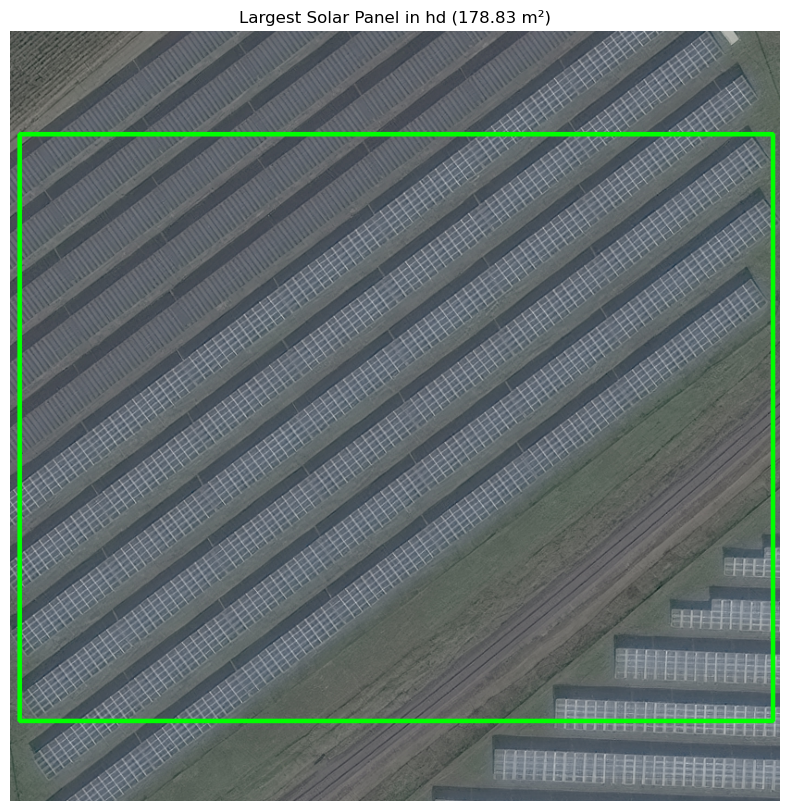

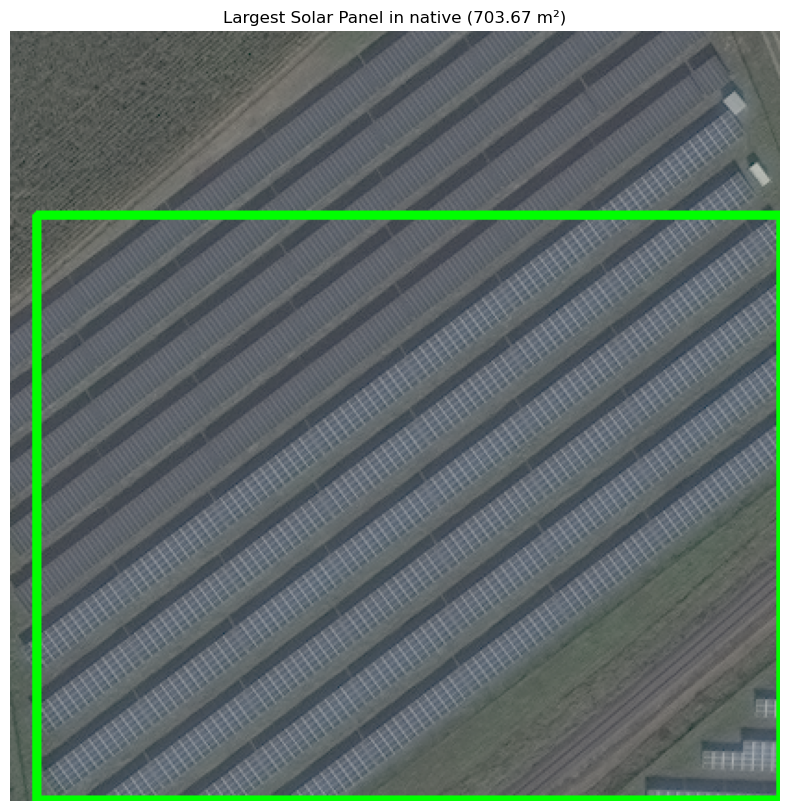

In [ ]:
def show_largest_solar_panel(image_type="hd"):
    label_dir = LABEL_DIRS[image_type]
    image_dir = IMAGE_DIRS[image_type]
    
    max_area = 0
    max_bbox = None
    max_image_path = None
    
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        bboxes = load_labels(label_path)
        
        for _, x_center, y_center, width, height in bboxes:
            img_w, img_h = IMAGE_SIZES[image_type]
            scale = REAL_WORLD_SCALE[image_type]
            real_width = width * img_w * scale
            real_height = height * img_h * scale 
            area = real_width * real_height

            if area > max_area:
                max_area = area
                max_bbox = (x_center, y_center, width, height)
                max_image_path = os.path.join(image_dir, label_file.replace(".txt", ".tif"))

    if max_image_path is None:
        print(f"No valid images found in {image_type}.")
        return
    
    # Load and display the image with the largest bounding box
    image = cv2.imread(max_image_path)
    if image is None:
        print(f"Error loading image: {max_image_path}")
        return
    
    img_h, img_w, _ = image.shape
    x_center, y_center, width, height = max_bbox

    x1 = int((x_center - width / 2) * img_w)
    y1 = int((y_center - height / 2) * img_h)
    x2 = int((x_center + width / 2) * img_w)
    y2 = int((y_center + height / 2) * img_h)

    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Largest Solar Panel in {image_type} ({max_area:.2f} m²)")
    plt.axis("off")
    plt.show()

show_largest_solar_panel("hd")
show_largest_solar_panel("native")
